In [1]:
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from configs import *
from fetch_data import *
from features_extraction import *
from data_shuffling_split import *
from data_preprocess import *
from ml_modeling import *

In [2]:
strat_train_set = read_csv("train/strat_train_set.csv")
strat_train_set.head()

Number of instances in the file are:  449033


,id,dialect,dialect_l_encoded,text
0,1056552188082716800,LY,8,توا دوشه الكلاسيكو شن بيتمها وشن بيسكتهم وشن ب...
1,891734969202114560,SY,15,حسابشخصي في احلي من الشحاطه 😂
2,1110565179257954432,SD,14,حسابشخصي موهبه والله 😂 اوع تحاول تطورها تقوم م...
3,1172817955270340608,LB,7,حسابشخصي حسابشخصي 😂 انا صرلي عشر سنين مش مجدده...
4,293253217821790208,QA,12,احلي شعور تكون باجازه وتقوم من الصبح وتمر ع ال...


In [3]:
x_train_text, x_val_text, y_train, y_val = prepare_data(strat_train_set)

The number of instances in the training data after StratifiedShuffleSplit are:  980
The number of instances in the testing data after StratifiedShuffleSplit are:   20
The number of trainin instances:  980
The number of validation instances:  20
The number of trainin labels :  980
The number of validation labels :  20


In [4]:
x_train_text_tokenized = tokenize_using_nltk_TreebankWordTokenizer(x_train_text)

print("Before Tokenization : \n", x_train_text[:3])
print("="*50)
print("After Tokenization : \n", x_train_text_tokenized[:3])
print("="*50)

x_val_text_tokenized = tokenize_using_nltk_TreebankWordTokenizer(x_val_text)

print("Before Tokenization : \n", x_val_text[:3])
print("="*50)
print("After Tokenization : \n", x_val_text_tokenized[:3])

Before Tokenization : 
 ['حسابشخصي الله يديم عليج السعاده يارب', 'حسابشخصي حق واجب عزكم عزنا 🇦🇪 الله لايفرقنا 💝 ', 'حسابشخصي اقول اقعد ع دراستكك احسنلك 🤚 ']
After Tokenization : 
 [['حسابشخصي', 'الله', 'يديم', 'عليج', 'السعاده', 'يارب'], ['حسابشخصي', 'حق', 'واجب', 'عزكم', 'عزنا', '🇦🇪', 'الله', 'لايفرقنا', '💝'], ['حسابشخصي', 'اقول', 'اقعد', 'ع', 'دراستكك', 'احسنلك', '🤚']]
Before Tokenization : 
 ['ايه ده , هو الاهلي ماوقعش عقوبه علي متعب فعلا , لا و الله , طيب فين المباديء , طيب فين الاخلاق , طيب اي حاجه مش كده 😂 ', 'حسابشخصي شكل مخك علبه سمنت كنز . . . ', 'حسابشخصي اقوئ اغنيه حب اتحدي العالم']
After Tokenization : 
 [['ايه', 'ده', ',', 'هو', 'الاهلي', 'ماوقعش', 'عقوبه', 'علي', 'متعب', 'فعلا', ',', 'لا', 'و', 'الله', ',', 'طيب', 'فين', 'المباديء', ',', 'طيب', 'فين', 'الاخلاق', ',', 'طيب', 'اي', 'حاجه', 'مش', 'كده', '😂'], ['حسابشخصي', 'شكل', 'مخك', 'علبه', 'سمنت', 'كنز', '.', '.', '.'], ['حسابشخصي', 'اقوئ', 'اغنيه', 'حب', 'اتحدي', 'العالم']]


# Curse of Dimensional & sparsity

Tasks like **Computer Vision** or **Natural Language Processing** run to problem called **Curse of Dimensional**, and as we have here NLP classification problem, the number of instance are semi-large, but this not the point, the point is what we dealing with is text language, and the language are free of grammar, ritch of vocabulary and others.

So to handle like these problems we need to extract features from the text, the old or classical way is using BOW (Bag of Words), and this approach run to the problem of **Curse of Dimensionality** as we will have number of features related to the unique words in our data. Not just that most of these features are zeros, what is we called sparse matrix.

Beside of that, this matrix we will get from that approach represent the text not the word itself, so there is no similarity between words and other problem.

# Word2Vec

From what we have of these problem we moved to another approach related to the word representation.

Word2vec is numerical representation of dense vector for the word semantics of meaning, including the implies meaning of the word. So we can use these word representation in our text as we will see.

But to train Word2Vec and got a pretty good result of word representation, it first require massive data millions of text document, and second to wait for a while for your model to train. So we use the idea of transfer learning, and use some of the pre trained Arabic Word2Vec models and download it to use in our task. 

**Check for more information about the models we used:** [AraVec](https://www.sciencedirect.com/science/article/pii/S1877050917321749)



# Build Matrix of Text

Any ML or DL model require specific number of features (input) to dealing with, but what we have here with word2vec is word representation. So how it works for text ?

We will build a matrix for each text, but we need to limit the number of words in each text, because we can not train the model with different number of words in text.

# Note !

We can take the maximum number of words in the longest text, but maybe for some documents its has thousand of words, so we use the graph below and other helpful method to get reasonable length.

In [5]:
# Get how many words inside each text after tokenization
num_of_words_in_each_text = [len(text) for text in x_train_text_tokenized]
max_len = max(num_of_words_in_each_text)
print("The max length is: ", max_len)
num_of_words_in_each_text[:10]

The max length is:  71


[6, 9, 7, 16, 21, 12, 23, 9, 8, 40]

The number of keys before removing are:  52
The number of keys after removing some of them are:  0


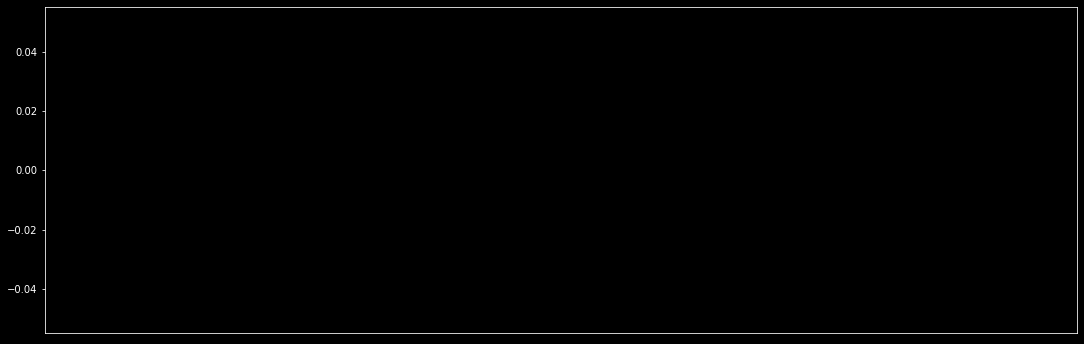

In [6]:
# count how many times these value repeated and sort them
new_dicts = get_keys_that_val_gr_than_num(num_of_words_in_each_text, 1000)
keys = list(new_dicts.keys())
values = list(new_dicts.values())
plt.style.use('dark_background')
fig = plt.gcf()
fig.set_size_inches(18.5, 6)
plt.bar(range(len(new_dicts)), values, tick_label=keys)
plt.show()

In [7]:
word_to_vec_model = load_word2vec_model("models/word2vec/mohamed_w2v_CBOW_300_3_400_10/w2v_CBOW_300_3_400_10.model")

In [8]:
number_of_features = 300
max_len_str = 64
X_train_embed_matrix = ML_text_to_matrix_using_word2vec(word_to_vec_model, x_train_text_tokenized, number_of_features, max_len_str)

X_val_embed_matrix = ML_text_to_matrix_using_word2vec(word_to_vec_model, x_val_text_tokenized, number_of_features, max_len_str)

The shape of matrix (980, 19200)
The shape of matrix (20, 19200)


# Train Logistic Regression

In [9]:
lg_cls_parameters = {'penalty':['l1', 'l2'], 'C': [.2, .5, 1]}
lg_cls = LogisticRegression(verbose=1)
grid_s_model = grid_search(lg_cls, lg_cls_parameters, X_train_embed_matrix, y_train)
_ = grid_search_result(grid_s_model)
model = LogisticRegression(penalty=grid_s_model.best_params_['penalty'], C=grid_s_model.best_params_['C'])
model_path_to_save = "models/lg_cls_model.sav"
model = model_fit(model, X_train_embed_matrix, y_train, model_path_to_save)
_ = f1_score_display(model, X_val_embed_matrix, y_val)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    8.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    8.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished


nan {'C': 0.2, 'penalty': 'l1'}
0.11632677310619562 {'C': 0.2, 'penalty': 'l2'}
nan {'C': 0.5, 'penalty': 'l1'}
0.11632677310619562 {'C': 0.5, 'penalty': 'l2'}
nan {'C': 1, 'penalty': 'l1'}
0.11632677310619562 {'C': 1, 'penalty': 'l2'}
The best score is:  0.11632677310619562
The best paramters for that score is:  {'C': 0.2, 'penalty': 'l2'}
===================== Validate Result =====================
F1 score is:  0.10000000000000002


# ExtraTreesClassifier

In [11]:
ex_tree_cls_parameters = {'max_depth':[3, 5]}
ex_tree_cls = ExtraTreesClassifier(n_estimators=30,bootstrap=True, oob_score=True, min_samples_leaf=100)
grid_s_model = grid_search(ex_tree_cls, ex_tree_cls_parameters, X_train_embed_matrix, y_train)
_ = grid_search_result(grid_s_model)
model = ExtraTreesClassifier(max_depth=grid_s_model.best_params_['max_depth'], n_estimators=30,bootstrap=True, oob_score=True, min_samples_leaf=100)
model_path_to_save = "models/ex_tree_model.sav"
model = model_fit(model, X_train_embed_matrix, y_train, model_path_to_save)
_ = f1_score_display(model, X_val_embed_matrix, y_val)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    6.1s remaining:   12.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    9.2s finished


0.11632677310619562 {'max_depth': 3}
0.11632677310619562 {'max_depth': 5}
The best score is:  0.11632677310619562
The best paramters for that score is:  {'max_depth': 3}
===================== Validate Result =====================
F1 score is:  0.10000000000000002


# Train SVC

In [10]:
# svc_parameters = {'C':[.5, 1]}
# svc_clf = SVC(kernel="linear")
# grid_s_model = grid_search(svc_clf, svc_parameters, X_train_embed_matrix, y_train)
# _ = grid_search_result(grid_s_model)
# model = SVC(kernel="linear", C=grid_s_model.best_params_['C'])
# model_path_to_save = "models/SVC_model.sav"
# model = model_fit(model, X_train_embed_matrix, y_train, model_path_to_save)
# _ = f1_score_display(model, X_val_embed_matrix, y_val)

# Note !

**We can use different word embedding representation, to see its effect on training.**